<a href="https://colab.research.google.com/github/raphaelfontenelle/-CNN-Convolution-Neural-Network/blob/main/CNN-classifier-for-the-MNIST-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN classifier for the MNIST dataset

In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

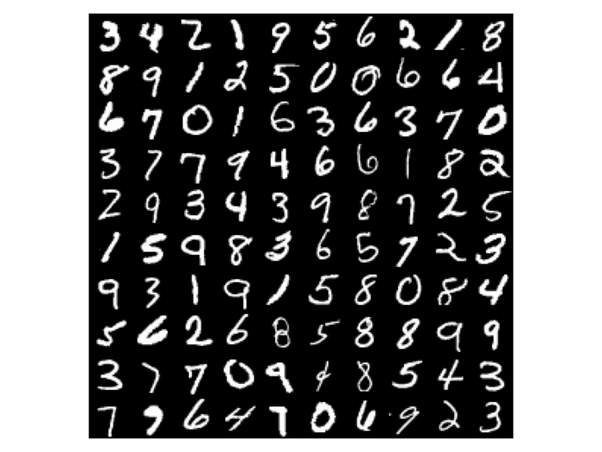

This dataset consists of a training set of 60,000 handwritten digits with corresponding labels.

In [61]:
# Run this cell to load the MNIST data
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [62]:
# Scale the image so that it stay between (0,1)
def scale_mnist_data(train_images, test_images):
    train_images = train_images/ 255.0
    test_images  = test_images / 255.0
    return train_images, test_images

In [63]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [64]:
# Add a dummy channel dimension
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [65]:
def get_model(input_shape):
    model = Sequential([
        Conv2D(8, (3,3), activation='relu', padding='SAME', input_shape=input_shape, data_format='channels_last'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [66]:
model = get_model(scaled_train_images[0].shape)

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
________________________________________________

In [68]:
def compile_model(model):
    model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [69]:
compile_model(model)

In [70]:
def train_model(model, scaled_train_images, train_labels):
    history = model.fit(scaled_train_images, train_labels, epochs=5, batch_size=64, verbose=2)   
    return history

In [71]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
938/938 - 16s - loss: 0.2456 - accuracy: 0.9305
Epoch 2/5
938/938 - 15s - loss: 0.0823 - accuracy: 0.9756
Epoch 3/5
938/938 - 15s - loss: 0.0572 - accuracy: 0.9828
Epoch 4/5
938/938 - 15s - loss: 0.0435 - accuracy: 0.9867
Epoch 5/5
938/938 - 15s - loss: 0.0351 - accuracy: 0.9891


In [72]:
frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

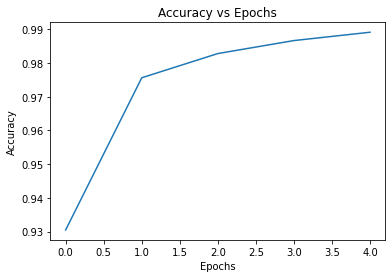

In [73]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

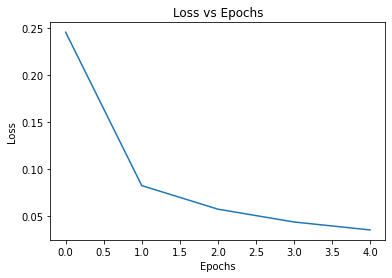

In [74]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [75]:
def evaluate_model(model, scaled_test_images, test_labels):
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose=2)
    return (test_loss, test_accuracy)

In [76]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0512 - accuracy: 0.9830
Test loss: 0.05115252733230591
Test accuracy: 0.9829999804496765


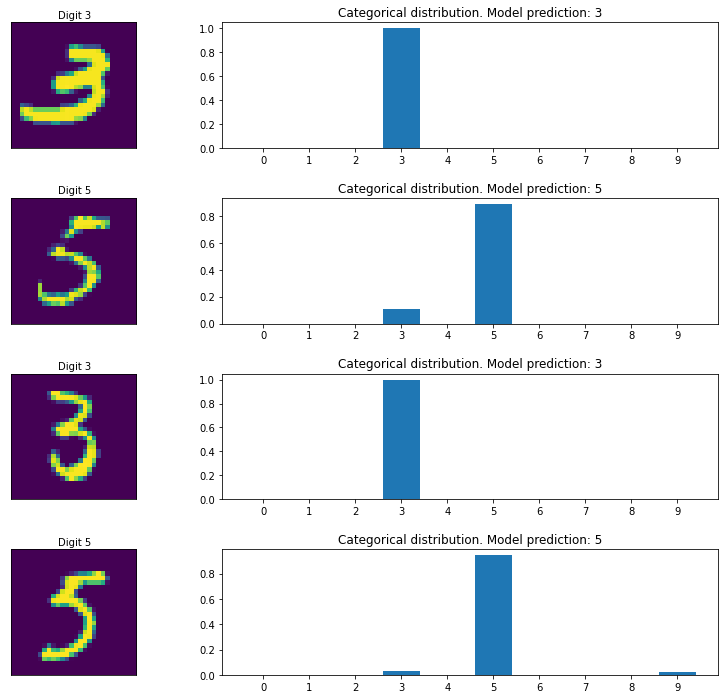

In [79]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()